## Demonstration of Regression fit using gradient descent. 
<a rel="license" href="https://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons Licence" style="width=50" src="https://licensebuttons.net/l/by/4.0/88x31.png" title='This work is licensed under a Creative Commons Attribution 4.0 International License.' align="right"/></a>

**Author**: Antonia Mey    
**Email**: antonia.mey@ed.ac.uk

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import stats 

from sklearn.datasets import make_regression 

sns.set_style("white")
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set_context("paper", font_scale=2)
rc={"lines.linewidth": 2}

In [2]:
!conda install scikit-learn --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 22.9.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/toni_brain/miniconda3/envs/ML

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-3.0.7              |       hfd90126_0         2.5 MB  conda-forge
    scikit-learn-1.1.3         |   py39hdbdcc14_1         7.7 MB  conda-forge
    ------------------------------------------------------------
                                           Total:        10.2 MB

The following packages will be UPDATED:

  openssl                                  3.0.5-hfd90126_2 --> 3.0.7-hfd90126_0
  scikit-learn                         1.1.2-py39h8031a56_0 --> 1.1.3-py39hdbdcc14_1



openssl-3.0.7        

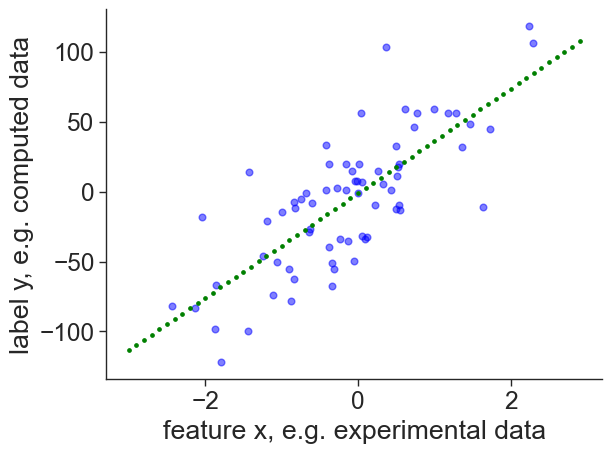

In [3]:
# Generate data
x, y = make_regression(n_samples = 70, n_features=1,
n_informative=1, noise=30, random_state=2)
x = x.flatten()

#line fitting
slope, intercept, _,_,_ = stats.linregress(x,y)
best_fit = np.vectorize(lambda x: x * slope + intercept)

#plotting
plt.plot(x,y, 'o', alpha=0.5, color='blue') 
plt.xlabel('feature x, e.g. experimental data')
plt.ylabel('label y, e.g. computed data')
grid = np.arange(-3,3,0.1) 
plt.plot(grid,best_fit(grid), '.', color='green')
sns.despine()

In [4]:
def gradient_descent(x, y, theta_init, learning_rate=0.001, maxsteps=0, precision=0.001, ): 
    costs = []
    m = y.size # number of data points 
    theta = theta_init
    history = [] # to store all thetas 
    preds = []
    counter = 0
    oldcost = 0
    pred = np.dot(x, theta)
    error = pred - y
    currentcost = np.sum(error ** 2) / (2 * m) 
    preds.append(pred)
    costs.append(currentcost) 
    history.append(theta)
    counter+=1
    while abs(currentcost - oldcost) > precision:
        oldcost=currentcost
        gradient = x.T.dot(error)/m
        theta = theta - learning_rate * gradient # update 
        history.append(theta)
        pred = np.dot(x, theta)
        error = pred - y
        currentcost = np.sum(error ** 2) / (2 * m) 
        costs.append(currentcost)
        if counter % 25 == 0: 
            preds.append(pred)
        counter+=1 
        if maxsteps:
            if counter == maxsteps: 
                break
    return history, costs, preds, counter

In [5]:
xaug = np.c_[np.ones(x.shape[0]), x]
#theta_i = [-15, 40] + np.random.rand(2)
theta_i = [20, 10]
history, cost, preds, iters = gradient_descent(xaug, y, theta_i, learning_rate=0.1) 
theta = history[-1]
print("Gradient Descent: {:.2f}, {:.2f} {:d}".format(theta[0], theta[1], iters)) 
print("Least Squares: {:.2f}, {:.2f}".format(intercept, slope))

Gradient Descent: -1.15, 37.33 52
Least Squares: -1.16, 37.41


In [6]:
len(history)

52

rendering frame  0
rendering frame  0
rendering frame  1
rendering frame  2
rendering frame  3
rendering frame  4
rendering frame  5
rendering frame  6
rendering frame  7
rendering frame  8
rendering frame  9
rendering frame  10
rendering frame  11
rendering frame  12
rendering frame  13
rendering frame  14
rendering frame  15
rendering frame  16
rendering frame  17
rendering frame  18
rendering frame  19
rendering frame  20
rendering frame  21
rendering frame  22
rendering frame  23
rendering frame  24
rendering frame  25
rendering frame  26
rendering frame  27
rendering frame  28
rendering frame  29
rendering frame  30
rendering frame  31
rendering frame  32
rendering frame  33
rendering frame  34
rendering frame  35
rendering frame  36
rendering frame  37
rendering frame  38
rendering frame  39
rendering frame  40
rendering frame  41
rendering frame  42
rendering frame  43
rendering frame  44
rendering frame  45
rendering frame  46
rendering frame  47
rendering frame  48
rendering f

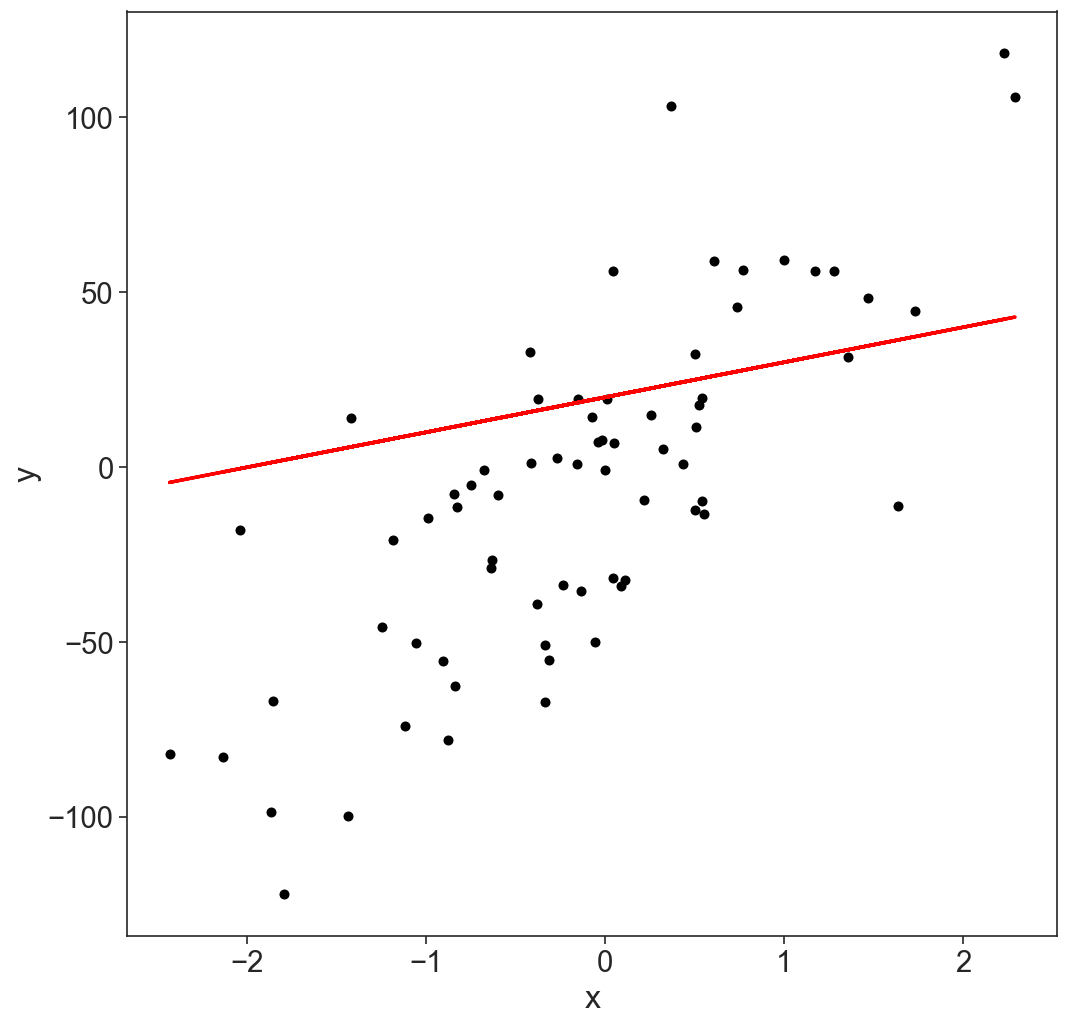

In [7]:
from matplotlib.animation import FuncAnimation, PillowWriter, ImageMagickFileWriter

plt.rcParams['animation.convert_path'] = 'C:\Program Files\\ImageMagick-7.1.0-Q16-HDRI\\magick.exe'
if False:
    writer = ImageMagickFileWriter(fps=30)
else:
    writer = PillowWriter(fps=30)

fig = plt.figure(figsize=(10, 10), dpi=120)
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel("x")
ax.set_ylabel("y")

def animate1(i):

    print("rendering frame ", i)
    samples = 5
    colors = plt.cm.viridis(np.linspace(0, 1, samples))

    for myaxes in ax.lines:
        ax.lines.remove(myaxes)

    ax.plot(x, y, "k.", markersize=10)

    ymodel = history[i][1]*x+history[i][0]
    ax.plot(x, ymodel, color="r", lw=2)

anim = FuncAnimation(fig, animate1, frames=len(history), interval=5, blit=False)

anim.save('video.gif',writer=writer)